In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [78]:
# Đọc dữ liệu
df_HN = pd.read_csv('AQI_HaNoi_Updated.csv')
df_DN = pd.read_csv('AQI_DaNang_Updated.csv')
df_VT = pd.read_csv('AQI_VietTri_Updated.csv')

df_HN = df_HN.reset_index()['AQI']
df_DN = df_DN.reset_index()['AQI']
df_VT = df_VT.reset_index()['AQI']

In [79]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df_HN=scaler.fit_transform(np.array(df_HN).reshape(-1,1))
df_DN=scaler.fit_transform(np.array(df_DN).reshape(-1,1))
df_VT=scaler.fit_transform(np.array(df_VT).reshape(-1,1))

In [80]:
# Chia dữ liệu train, test theo tỉ lệ 9:1

# Hà Nội
train_size_HN = int(0.9 * len(df_HN))
test_size_HN = len(df_HN) - train_size_HN

train_data_HN = df_HN[:train_size_HN]
test_data_HN = df_HN[train_size_HN:train_size_HN+test_size_HN]

# Đà Nẵng
train_size_DN = int(0.9 * len(df_DN))
test_size_DN = len(df_DN) - train_size_DN

train_data_DN = df_DN[:train_size_DN]
test_data_DN = df_DN[train_size_DN:train_size_DN+test_size_DN]

#Việt Trì
train_size_VT = int(0.9 * len(df_VT))
test_size_VT = len(df_VT) - train_size_VT

train_data_VT = df_VT[:train_size_VT]
test_data_VT = df_VT[train_size_VT:train_size_VT+test_size_VT]

In [81]:
# Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=100):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [82]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train_HN, y_train_HN = create_dataset(train_data_HN, time_step)
X_test_HN, y_test_HN = create_dataset(test_data_HN, time_step)

X_train_DN, y_train_DN = create_dataset(train_data_DN, time_step)
X_test_DN, y_test_DN = create_dataset(test_data_DN, time_step)

X_train_VT, y_train_VT = create_dataset(train_data_VT, time_step)
X_test_VT, y_test_VT = create_dataset(test_data_VT, time_step)

In [83]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train_HN = X_train_HN.reshape(X_train_HN.shape[0],X_train_HN.shape[1] , 1)
X_test_HN = X_test_HN.reshape(X_test_HN.shape[0],X_test_HN.shape[1] , 1)

X_train_DN = X_train_DN.reshape(X_train_DN.shape[0],X_train_DN.shape[1] , 1)
X_test_DN = X_test_DN.reshape(X_test_DN.shape[0],X_test_DN.shape[1] , 1)

X_train_VT = X_train_VT.reshape(X_train_VT.shape[0],X_train_VT.shape[1] , 1)
X_test_VT = X_test_VT.reshape(X_test_VT.shape[0],X_test_VT.shape[1] , 1)

In [84]:
# Define LSTM Model

model_HN = Sequential()
model_HN.add(SimpleRNN(50, input_shape=(time_step, 1)))
model_HN.add(Dense(1))
model_HN.compile(loss='mean_squared_error',optimizer='adam')

model_DN = Sequential()
model_DN.add(SimpleRNN(50, input_shape=(time_step, 1)))
model_DN.add(Dense(1))
model_DN.compile(loss='mean_squared_error',optimizer='adam')

model_VT = Sequential()
model_VT.add(SimpleRNN(50, input_shape=(time_step, 1)))
model_VT.add(Dense(1))
model_VT.compile(loss='mean_squared_error',optimizer='adam')

In [85]:
# Fit mô hình với dữ liệu train
model_HN.fit(X_train_HN,y_train_HN,validation_data=(X_test_HN,y_test_HN),epochs=100,batch_size=64,verbose=1)
model_DN.fit(X_train_DN,y_train_DN,validation_data=(X_test_DN,y_test_DN),epochs=100,batch_size=64,verbose=1)
model_VT.fit(X_train_VT,y_train_VT,validation_data=(X_test_VT,y_test_VT),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
28/28 [==============================] - 2s 30ms/step - loss: 0.0643 - val_loss: 0.0243
Epoch 2/100
28/28 [==============================] - 1s 21ms/step - loss: 0.0220 - val_loss: 0.0188
Epoch 3/100
28/28 [==============================] - 1s 21ms/step - loss: 0.0191 - val_loss: 0.0185
Epoch 4/100
28/28 [==============================] - 1s 21ms/step - loss: 0.0180 - val_loss: 0.0163
Epoch 5/100
28/28 [==============================] - 1s 22ms/step - loss: 0.0170 - val_loss: 0.0150
Epoch 6/100
28/28 [==============================] - 1s 22ms/step - loss: 0.0169 - val_loss: 0.0145
Epoch 7/100
28/28 [==============================] - 1s 23ms/step - loss: 0.0159 - val_loss: 0.0142
Epoch 8/100
28/28 [==============================] - 1s 22ms/step - loss: 0.0157 - val_loss: 0.0140
Epoch 9/100
28/28 [==============================] - 1s 22ms/step - loss: 0.0151 - val_loss: 0.0138
Epoch 10/100
28/28 [==============================] - 1s 22ms/step - loss: 0.0149 - val_loss: 0.0138

In [86]:
# 10. Dự báo dữ liệu test
y_pred_HN=model_HN.predict(X_test_HN)
y_pred_DN=model_DN.predict(X_test_DN)
y_pred_VT=model_VT.predict(X_test_VT)

4/4 [==============================] - 0s 6ms/step


In [87]:
# Chuẩn hóa dữ liệu y_pred
y_pred_HN=scaler.inverse_transform(y_pred_HN)
y_pred_DN=scaler.inverse_transform(y_pred_DN)
y_pred_VT=scaler.inverse_transform(y_pred_VT)

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_test_HN_scale=scaler.inverse_transform(y_test_HN.reshape(-1,1))
y_test_DN_scale=scaler.inverse_transform(y_test_DN.reshape(-1,1))
y_test_VT_scale=scaler.inverse_transform(y_test_VT.reshape(-1,1))

# Hà Nội
mape_HN = np.mean(np.abs((y_test_HN_scale - y_pred_HN) / y_test_HN_scale)) * 100
mae_HN = mean_absolute_error(y_test_HN_scale, y_pred_HN)
rmse_HN = np.sqrt(mean_squared_error(y_test_HN_scale, y_pred_HN))

print(f'Hà Nội MAPE: {mape_HN:.2f}%')
print(f'Hà Nội MAE: {mae_HN:.2f}')
print(f'Hà Nội RMSE: {rmse_HN:.2f}')

# Đà Nẵng
mape_DN = np.mean(np.abs((y_test_DN_scale - y_pred_DN) / y_test_DN_scale)) * 100
mae_DN = mean_absolute_error(y_test_DN_scale, y_pred_DN)
rmse_DN = np.sqrt(mean_squared_error(y_test_DN_scale, y_pred_DN))

print(f'Đà Nẵng MAPE: {mape_DN:.2f}%')
print(f'Đà Nẵng MAE: {mae_DN:.2f}')
print(f'Đà Nẵng RMSE: {rmse_DN:.2f}')

#Việt Trì
mape_VT = np.mean(np.abs((y_test_VT_scale - y_pred_VT) / y_test_VT_scale)) * 100
mae_VT = mean_absolute_error(y_test_VT_scale, y_pred_VT)
rmse_VT = np.sqrt(mean_squared_error(y_test_VT_scale, y_pred_VT))

print(f'Việt Trì MAPE: {mape_VT:.2f}%')
print(f'Việt Trì MAE: {mae_VT:.2f}')
print(f'Việt Trì RMSE: {rmse_VT:.2f}')

Hà Nội MAPE: 20.53%
Hà Nội MAE: 20.80
Hà Nội RMSE: 26.61
Đà Nẵng MAPE: 44.35%
Đà Nẵng MAE: 12.84
Đà Nẵng RMSE: 16.50
Việt Trì MAPE: 39.00%
Việt Trì MAE: 26.50
Việt Trì RMSE: 33.21


In [89]:
# Dự báo 30 ngày tiếp theo

x_input_HN = test_data_HN[110:].reshape(1, -1)
x_input_DN = test_data_DN[98:].reshape(1, -1)
x_input_VT = test_data_VT[98:].reshape(1, -1)

temp_input_HN = list(x_input_HN[0])
temp_input_DN = list(x_input_DN[0])
temp_input_VT = list(x_input_VT[0])

lst_output_HN_30 = []
lst_output_DN_30 = []
lst_output_VT_30 = []

n_steps = 100
i = 0

while i < 30:
    # Forecast for HN
    if len(temp_input_HN) > 100:
        x_input_HN = np.array(temp_input_HN[1:])
        x_input_HN = x_input_HN.reshape(1, -1)
        x_input_HN = x_input_HN.reshape((1, n_steps, 1))
        yhat_HN = model_HN.predict(x_input_HN, verbose=0)
        temp_input_HN.extend(yhat_HN[0].tolist())
        temp_input_HN = temp_input_HN[1:]
        lst_output_HN_30.extend(yhat_HN.tolist())

    else:
        x_input_HN = x_input_HN.reshape((1, n_steps, 1))
        yhat_HN = model_HN.predict(x_input_HN, verbose=0)
        temp_input_HN.extend(yhat_HN[0].tolist())
        lst_output_HN_30.extend(yhat_HN.tolist())

    # Forecast for DN
    if len(temp_input_DN) > 100:
        x_input_DN = np.array(temp_input_DN[1:])
        x_input_DN = x_input_DN.reshape(1, -1)
        x_input_DN = x_input_DN.reshape((1, n_steps, 1))
        yhat_DN = model_DN.predict(x_input_DN, verbose=0)
        temp_input_DN.extend(yhat_DN[0].tolist())
        temp_input_DN = temp_input_DN[1:]
        lst_output_DN_30.extend(yhat_DN.tolist())

    else:
        x_input_DN = x_input_DN.reshape((1, n_steps, 1))
        yhat_DN = model_DN.predict(x_input_DN, verbose=0)
        temp_input_DN.extend(yhat_DN[0].tolist())
        lst_output_DN_30.extend(yhat_DN.tolist())

    # Forecast for VT
    if len(temp_input_VT) > 100:
        x_input_VT = np.array(temp_input_VT[1:])
        x_input_VT = x_input_VT.reshape(1, -1)
        x_input_VT = x_input_VT.reshape((1, n_steps, 1))
        yhat_VT = model_VT.predict(x_input_VT, verbose=0)
        temp_input_VT.extend(yhat_VT[0].tolist())
        temp_input_VT = temp_input_VT[1:]
        lst_output_VT_30.extend(yhat_VT.tolist())

    else:
        x_input_VT = x_input_VT.reshape((1, n_steps, 1))
        yhat_VT = model_VT.predict(x_input_VT, verbose=0)
        temp_input_VT.extend(yhat_VT[0].tolist())
        lst_output_VT_30.extend(yhat_VT.tolist())

    i += 1

In [90]:
# Dự báo 60 ngày tiếp theo

x_input_HN = test_data_HN[110:].reshape(1, -1)
x_input_DN = test_data_DN[98:].reshape(1, -1)
x_input_VT = test_data_VT[98:].reshape(1, -1)


temp_input_HN = list(x_input_HN[0])
temp_input_DN = list(x_input_DN[0])
temp_input_VT = list(x_input_VT[0])

lst_output_HN_60 = []
lst_output_DN_60 = []
lst_output_VT_60 = []

n_steps = 100
i = 0

while i < 60:
    # Forecast for HN
    if len(temp_input_HN) > 100:
        x_input_HN = np.array(temp_input_HN[1:])
        x_input_HN = x_input_HN.reshape(1, -1)
        x_input_HN = x_input_HN.reshape((1, n_steps, 1))
        yhat_HN = model_HN.predict(x_input_HN, verbose=0)
        temp_input_HN.extend(yhat_HN[0].tolist())
        temp_input_HN = temp_input_HN[1:]
        lst_output_HN_60.extend(yhat_HN.tolist())

    else:
        x_input_HN = x_input_HN.reshape((1, n_steps, 1))
        yhat_HN = model_HN.predict(x_input_HN, verbose=0)
        temp_input_HN.extend(yhat_HN[0].tolist())
        lst_output_HN_60.extend(yhat_HN.tolist())

    # Forecast for DN
    if len(temp_input_DN) > 100:
        x_input_DN = np.array(temp_input_DN[1:])
        x_input_DN = x_input_DN.reshape(1, -1)
        x_input_DN = x_input_DN.reshape((1, n_steps, 1))
        yhat_DN = model_DN.predict(x_input_DN, verbose=0)
        temp_input_DN.extend(yhat_DN[0].tolist())
        temp_input_DN = temp_input_DN[1:]
        lst_output_DN_60.extend(yhat_DN.tolist())

    else:
        x_input_DN = x_input_DN.reshape((1, n_steps, 1))
        yhat_DN = model_DN.predict(x_input_DN, verbose=0)
        temp_input_DN.extend(yhat_DN[0].tolist())
        lst_output_DN_60.extend(yhat_DN.tolist())

    # Forecast for VT
    if len(temp_input_VT) > 100:
        x_input_VT = np.array(temp_input_VT[1:])
        x_input_VT = x_input_VT.reshape(1, -1)
        x_input_VT = x_input_VT.reshape((1, n_steps, 1))
        yhat_VT = model_VT.predict(x_input_VT, verbose=0)
        temp_input_VT.extend(yhat_VT[0].tolist())
        temp_input_VT = temp_input_VT[1:]
        lst_output_VT_60.extend(yhat_VT.tolist())

    else:
        x_input_VT = x_input_VT.reshape((1, n_steps, 1))
        yhat_VT = model_VT.predict(x_input_VT, verbose=0)
        temp_input_VT.extend(yhat_VT[0].tolist())
        lst_output_VT_60.extend(yhat_VT.tolist())

    i += 1

In [91]:
# Dự báo 90 ngày tiếp theo

x_input_HN = test_data_HN[110:].reshape(1, -1)
x_input_DN = test_data_DN[98:].reshape(1, -1)
x_input_VT = test_data_VT[98:].reshape(1, -1)

temp_input_HN = list(x_input_HN[0])
temp_input_DN = list(x_input_DN[0])
temp_input_VT = list(x_input_VT[0])

lst_output_HN_90 = []
lst_output_DN_90 = []
lst_output_VT_90 = []

n_steps = 100
i = 0

while i < 90:
    # Forecast for HN
    if len(temp_input_HN) > 100:
        x_input_HN = np.array(temp_input_HN[1:])
        x_input_HN = x_input_HN.reshape(1, -1)
        x_input_HN = x_input_HN.reshape((1, n_steps, 1))
        yhat_HN = model_HN.predict(x_input_HN, verbose=0)
        temp_input_HN.extend(yhat_HN[0].tolist())
        temp_input_HN = temp_input_HN[1:]
        lst_output_HN_90.extend(yhat_HN.tolist())

    else:
        x_input_HN = x_input_HN.reshape((1, n_steps, 1))
        yhat_HN = model_HN.predict(x_input_HN, verbose=0)
        temp_input_HN.extend(yhat_HN[0].tolist())
        lst_output_HN_90.extend(yhat_HN.tolist())

    # Forecast for DN
    if len(temp_input_DN) > 100:
        x_input_DN = np.array(temp_input_DN[1:])
        x_input_DN = x_input_DN.reshape(1, -1)
        x_input_DN = x_input_DN.reshape((1, n_steps, 1))
        yhat_DN = model_DN.predict(x_input_DN, verbose=0)
        temp_input_DN.extend(yhat_DN[0].tolist())
        temp_input_DN = temp_input_DN[1:]
        lst_output_DN_90.extend(yhat_DN.tolist())

    else:
        x_input_DN = x_input_DN.reshape((1, n_steps, 1))
        yhat_DN = model_DN.predict(x_input_DN, verbose=0)
        temp_input_DN.extend(yhat_DN[0].tolist())
        lst_output_DN_90.extend(yhat_DN.tolist())

    # Forecast for VT
    if len(temp_input_VT) > 100:
        x_input_VT = np.array(temp_input_VT[1:])
        x_input_VT = x_input_VT.reshape(1, -1)
        x_input_VT = x_input_VT.reshape((1, n_steps, 1))
        yhat_VT = model_VT.predict(x_input_VT, verbose=0)
        temp_input_VT.extend(yhat_VT[0].tolist())
        temp_input_VT = temp_input_VT[1:]
        lst_output_VT_90.extend(yhat_VT.tolist())

    else:
        x_input_VT = x_input_VT.reshape((1, n_steps, 1))
        yhat_VT = model_VT.predict(x_input_VT, verbose=0)
        temp_input_VT.extend(yhat_VT[0].tolist())
        lst_output_VT_90.extend(yhat_VT.tolist())

    i += 1

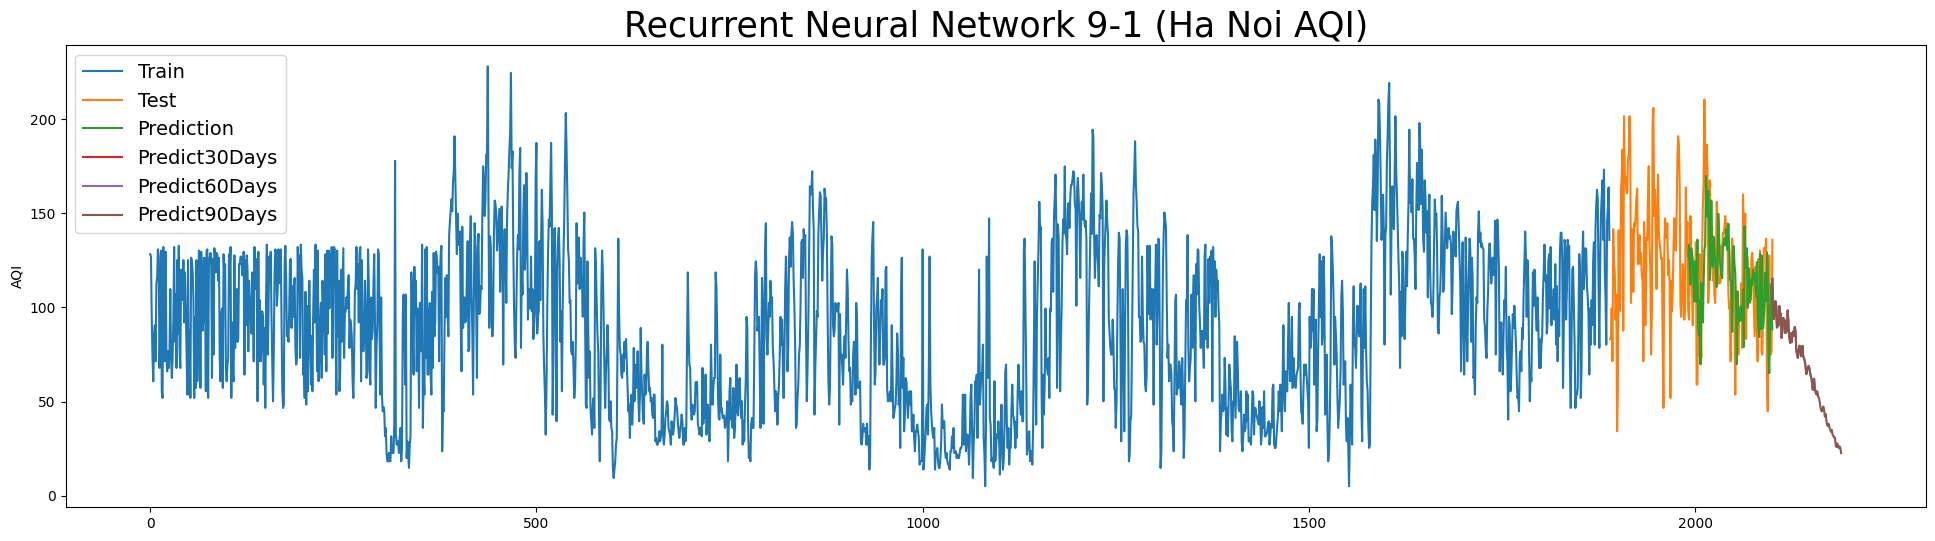

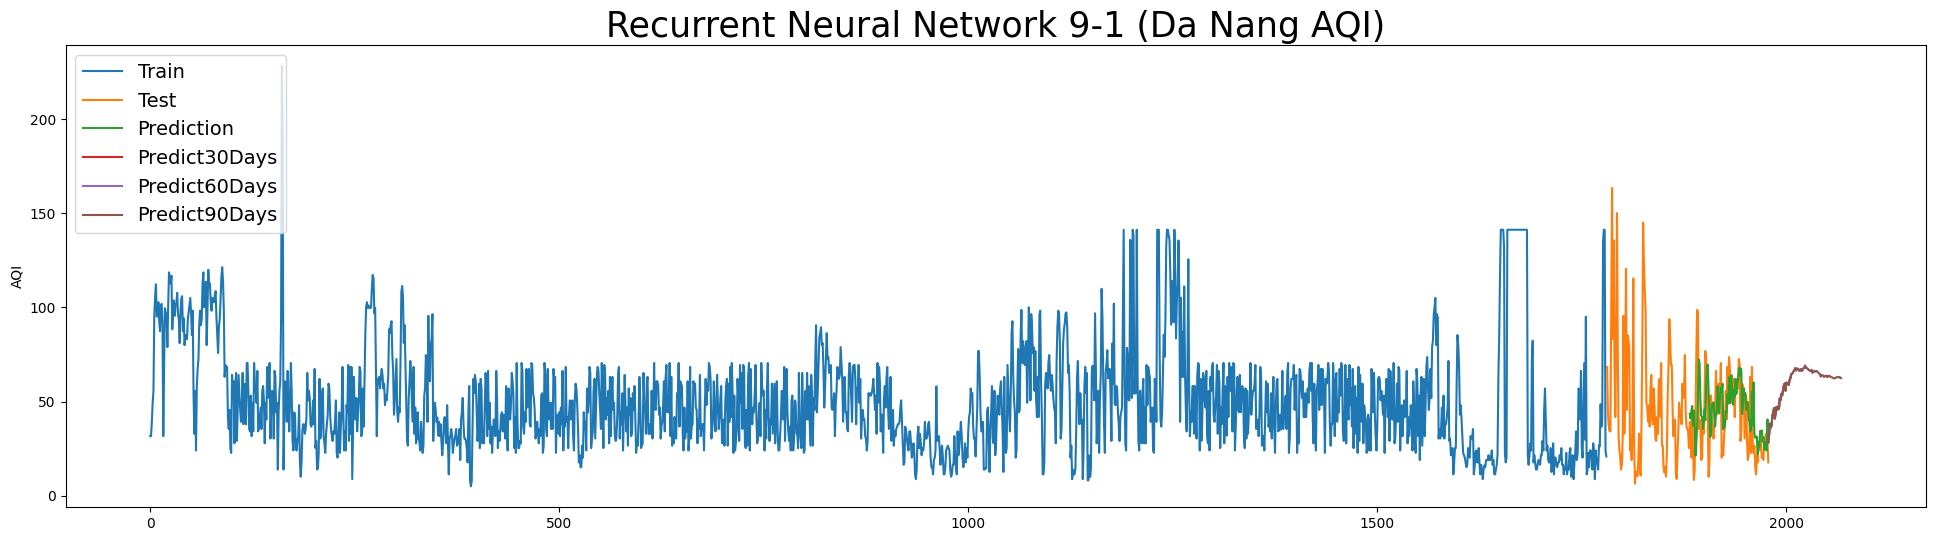

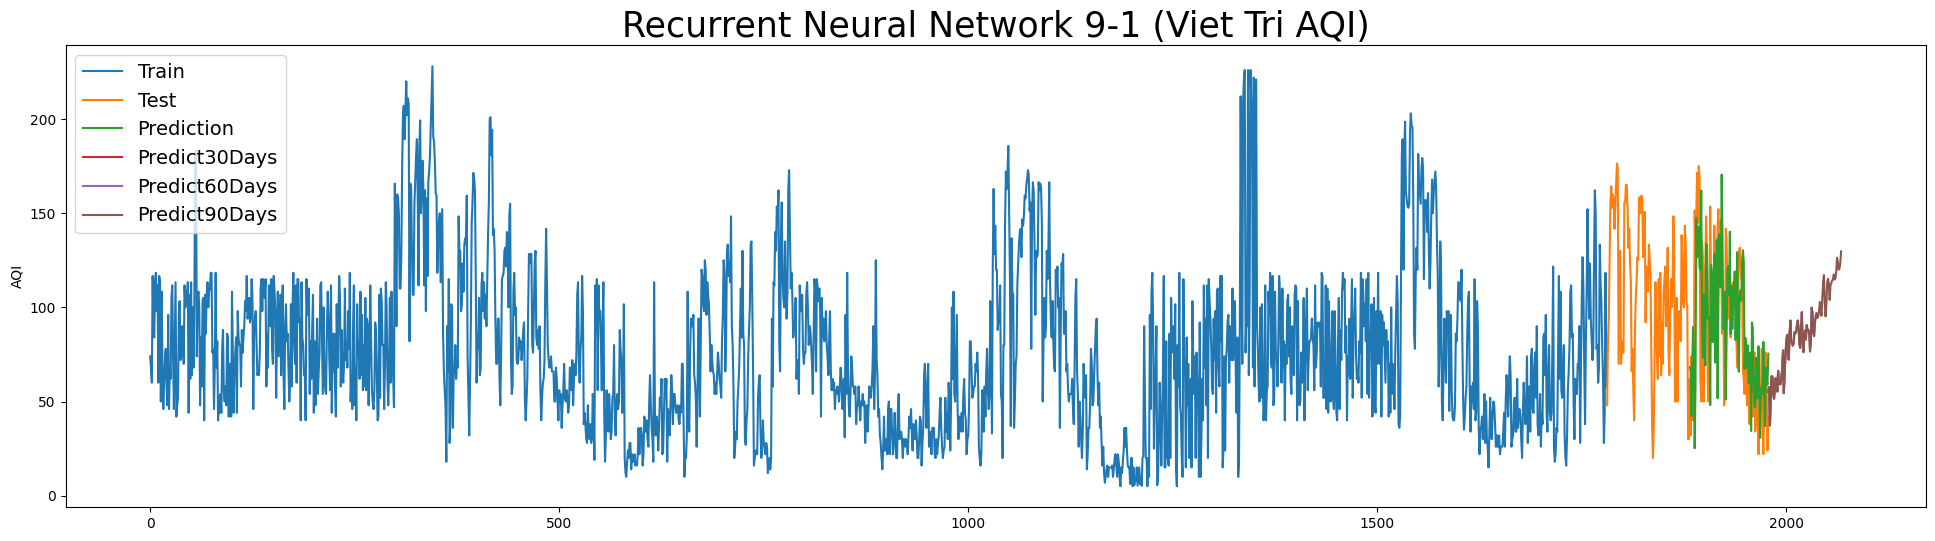

In [92]:
# Vẽ hình
plt.figure(figsize=(24, 6))
train_data_index_HN = pd.RangeIndex(start=0, stop=train_size_HN, step=1)
plt.plot(scaler.inverse_transform(train_data_HN))
test_data_index_HN = pd.RangeIndex(start=train_size_HN, stop=train_size_HN+test_size_HN, step=1)
plt.plot(test_data_index_HN,scaler.inverse_transform(test_data_HN))
test_data_index_HN = pd.RangeIndex(start=train_size_HN+101, stop=train_size_HN+test_size_HN, step=1)
plt.plot(test_data_index_HN,(y_pred_HN))
predict_data_index_HN_30 = pd.RangeIndex(start=len(df_HN)-1, stop=len(df_HN)+29, step=1)
plt.plot(predict_data_index_HN_30,scaler.inverse_transform(lst_output_HN_30))
predict_data_index_HN_60 = pd.RangeIndex(start=len(df_HN)-1, stop=len(df_HN)+59, step=1)
plt.plot(predict_data_index_HN_60,scaler.inverse_transform(lst_output_HN_60))
predict_data_index_HN_90 = pd.RangeIndex(start=len(df_HN)-1, stop=len(df_HN)+89, step=1)
plt.plot(predict_data_index_HN_90,scaler.inverse_transform(lst_output_HN_90))
plt.title('Recurrent Neural Network 9-1 (Ha Noi AQI)', fontsize=25)
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict30Days', 'Predict60Days', 'Predict90Days'], loc='upper left', fontsize=14)
plt.show()

plt.figure(figsize=(24, 6))
train_data_index_DN = pd.RangeIndex(start=0, stop=train_size_DN, step=1)
plt.plot(scaler.inverse_transform(train_data_DN))
test_data_index_DN = pd.RangeIndex(start=train_size_DN, stop=train_size_DN+test_size_DN, step=1)
plt.plot(test_data_index_DN,scaler.inverse_transform(test_data_DN))
test_data_index_DN = pd.RangeIndex(start=train_size_DN+101, stop=train_size_DN+test_size_DN, step=1)
plt.plot(test_data_index_DN,(y_pred_DN))
predict_data_index_DN_30 = pd.RangeIndex(start=len(df_DN)-1, stop=len(df_DN)+29, step=1)
plt.plot(predict_data_index_DN_30,scaler.inverse_transform(lst_output_DN_30))
predict_data_index_DN_60 = pd.RangeIndex(start=len(df_DN)-1, stop=len(df_DN)+59, step=1)
plt.plot(predict_data_index_DN_60,scaler.inverse_transform(lst_output_DN_60))
predict_data_index_DN_90 = pd.RangeIndex(start=len(df_DN)-1, stop=len(df_DN)+89, step=1)
plt.plot(predict_data_index_DN_90,scaler.inverse_transform(lst_output_DN_90))

plt.title('Recurrent Neural Network 9-1 (Da Nang AQI)', fontsize=25)
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict30Days', 'Predict60Days', 'Predict90Days'], loc='upper left', fontsize=14)
plt.show()

plt.figure(figsize=(24, 6))
train_data_index_VT = pd.RangeIndex(start=0, stop=train_size_VT, step=1)
plt.plot(scaler.inverse_transform(train_data_VT))
test_data_index_VT = pd.RangeIndex(start=train_size_VT, stop=train_size_VT+test_size_VT, step=1)
plt.plot(test_data_index_VT,scaler.inverse_transform(test_data_VT))
test_data_index_VT = pd.RangeIndex(start=train_size_VT+101, stop=train_size_VT+test_size_VT, step=1)
plt.plot(test_data_index_VT,(y_pred_VT))
predict_data_index_VT_30 = pd.RangeIndex(start=len(df_VT)-1, stop=len(df_VT)+29, step=1)
plt.plot(predict_data_index_VT_30,scaler.inverse_transform(lst_output_VT_30))
predict_data_index_VT_60 = pd.RangeIndex(start=len(df_VT)-1, stop=len(df_VT)+59, step=1)
plt.plot(predict_data_index_VT_60,scaler.inverse_transform(lst_output_VT_60))
predict_data_index_VT_90 = pd.RangeIndex(start=len(df_VT)-1, stop=len(df_VT)+89, step=1)
plt.plot(predict_data_index_VT_90,scaler.inverse_transform(lst_output_VT_90))
plt.title('Recurrent Neural Network 9-1 (Viet Tri AQI)', fontsize=25)
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict30Days', 'Predict60Days', 'Predict90Days'], loc='upper left', fontsize=14)
plt.show()

In [93]:
# Chia dữ liệu train, test theo tỉ lệ 7:3

# Hà Nội
train_size_HN = int(0.7 * len(df_HN))
test_size_HN = len(df_HN) - train_size_HN

train_data_HN = df_HN[:train_size_HN]
test_data_HN = df_HN[train_size_HN:train_size_HN+test_size_HN]

# Đà Nẵng
train_size_DN = int(0.7 * len(df_DN))
test_size_DN = len(df_DN) - train_size_DN

train_data_DN = df_DN[:train_size_DN]
test_data_DN = df_DN[train_size_DN:train_size_DN+test_size_DN]

#Việt Trì
train_size_VT = int(0.7 * len(df_VT))
test_size_VT = len(df_VT) - train_size_VT

train_data_VT = df_VT[:train_size_VT]
test_data_VT = df_VT[train_size_VT:train_size_VT+test_size_VT]

In [94]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train_HN, y_train_HN = create_dataset(train_data_HN, time_step)
X_test_HN, y_test_HN = create_dataset(test_data_HN, time_step)

X_train_DN, y_train_DN = create_dataset(train_data_DN, time_step)
X_test_DN, y_test_DN = create_dataset(test_data_DN, time_step)

X_train_VT, y_train_VT = create_dataset(train_data_VT, time_step)
X_test_VT, y_test_VT = create_dataset(test_data_VT, time_step)

In [95]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train_HN = X_train_HN.reshape(X_train_HN.shape[0],X_train_HN.shape[1] , 1)
X_test_HN = X_test_HN.reshape(X_test_HN.shape[0],X_test_HN.shape[1] , 1)

X_train_DN = X_train_DN.reshape(X_train_DN.shape[0],X_train_DN.shape[1] , 1)
X_test_DN = X_test_DN.reshape(X_test_DN.shape[0],X_test_DN.shape[1] , 1)

X_train_VT = X_train_VT.reshape(X_train_VT.shape[0],X_train_VT.shape[1] , 1)
X_test_VT = X_test_VT.reshape(X_test_VT.shape[0],X_test_VT.shape[1] , 1)

In [96]:
# Define LSTM Model

model_HN = Sequential()
model_HN.add(SimpleRNN(50, input_shape=(time_step, 1)))
model_HN.add(Dense(1))
model_HN.compile(loss='mean_squared_error',optimizer='adam')

model_DN = Sequential()
model_DN.add(SimpleRNN(50, input_shape=(time_step, 1)))
model_DN.add(Dense(1))
model_DN.compile(loss='mean_squared_error',optimizer='adam')

model_VT = Sequential()
model_VT.add(SimpleRNN(50, input_shape=(time_step, 1)))
model_VT.add(Dense(1))
model_VT.compile(loss='mean_squared_error',optimizer='adam')

In [97]:
# Fit mô hình với dữ liệu train
model_HN.fit(X_train_HN,y_train_HN,validation_data=(X_test_HN,y_test_HN),epochs=100,batch_size=64,verbose=1)
model_DN.fit(X_train_DN,y_train_DN,validation_data=(X_test_DN,y_test_DN),epochs=100,batch_size=64,verbose=1)
model_VT.fit(X_train_VT,y_train_VT,validation_data=(X_test_VT,y_test_VT),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 2s 33ms/step - loss: 0.0215 - val_loss: 0.0173
Epoch 2/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0168 - val_loss: 0.0214
Epoch 3/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0158 - val_loss: 0.0173
Epoch 4/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0151 - val_loss: 0.0195
Epoch 5/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0150 - val_loss: 0.0160
Epoch 6/100
22/22 [==============================] - 1s 30ms/step - loss: 0.0147 - val_loss: 0.0161
Epoch 7/100
22/22 [==============================] - 1s 23ms/step - loss: 0.0142 - val_loss: 0.0148
Epoch 8/100
22/22 [==============================] - 0s 22ms/step - loss: 0.0148 - val_loss: 0.0151
Epoch 9/100
22/22 [==============================] - 1s 23ms/step - loss: 0.0144 - val_loss: 0.0153
Epoch 10/100
22/22 [==============================] - 0s 21ms/step - loss: 0.0142 - val_loss: 0.0155

In [98]:
# 10. Dự báo dữ liệu test
y_pred_HN=model_HN.predict(X_test_HN)
y_pred_DN=model_DN.predict(X_test_DN)
y_pred_VT=model_VT.predict(X_test_VT)

16/16 [==============================] - 0s 10ms/step


In [99]:
# Chuẩn hóa dữ liệu y_pred
y_pred_HN=scaler.inverse_transform(y_pred_HN)
y_pred_DN=scaler.inverse_transform(y_pred_DN)
y_pred_VT=scaler.inverse_transform(y_pred_VT)

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_test_HN_scale=scaler.inverse_transform(y_test_HN.reshape(-1,1))
y_test_DN_scale=scaler.inverse_transform(y_test_DN.reshape(-1,1))
y_test_VT_scale=scaler.inverse_transform(y_test_VT.reshape(-1,1))

# Hà Nội
mape_HN = np.mean(np.abs((y_test_HN_scale - y_pred_HN) / y_test_HN_scale)) * 100
mae_HN = mean_absolute_error(y_test_HN_scale, y_pred_HN)
rmse_HN = np.sqrt(mean_squared_error(y_test_HN_scale, y_pred_HN))

print(f'Hà Nội MAPE: {mape_HN:.2f}%')
print(f'Hà Nội MAE: {mae_HN:.2f}')
print(f'Hà Nội RMSE: {rmse_HN:.2f}')

# Đà Nẵng
mape_DN = np.mean(np.abs((y_test_DN_scale - y_pred_DN) / y_test_DN_scale)) * 100
mae_DN = mean_absolute_error(y_test_DN_scale, y_pred_DN)
rmse_DN = np.sqrt(mean_squared_error(y_test_DN_scale, y_pred_DN))

print(f'Đà Nẵng MAPE: {mape_DN:.2f}%')
print(f'Đà Nẵng MAE: {mae_DN:.2f}')
print(f'Đà Nẵng RMSE: {rmse_DN:.2f}')

#Việt Trì
mape_VT = np.mean(np.abs((y_test_VT_scale - y_pred_VT) / y_test_VT_scale)) * 100
mae_VT = mean_absolute_error(y_test_VT_scale, y_pred_VT)
rmse_VT = np.sqrt(mean_squared_error(y_test_VT_scale, y_pred_VT))

print(f'Việt Trì MAPE: {mape_VT:.2f}%')
print(f'Việt Trì MAE: {mae_VT:.2f}')
print(f'Việt Trì RMSE: {rmse_VT:.2f}')

Hà Nội MAPE: 21.84%
Hà Nội MAE: 22.24
Hà Nội RMSE: 28.28
Đà Nẵng MAPE: 49.52%
Đà Nẵng MAE: 16.57
Đà Nẵng RMSE: 23.04
Việt Trì MAPE: 38.35%
Việt Trì MAE: 23.50
Việt Trì RMSE: 29.36


In [101]:
# Dự báo 30 ngày tiếp theo

x_input_HN = test_data_HN[530:].reshape(1, -1)
x_input_DN = test_data_DN[494:].reshape(1, -1)
x_input_VT = test_data_VT[494:].reshape(1, -1)

temp_input_HN = list(x_input_HN[0])
temp_input_DN = list(x_input_DN[0])
temp_input_VT = list(x_input_VT[0])

lst_output_HN = []
lst_output_DN = []
lst_output_VT = []

n_steps = 100
i = 0

while i < 30:
    # Forecast for HN
    if len(temp_input_HN) > 100:
        x_input_HN = np.array(temp_input_HN[1:])
        x_input_HN = x_input_HN.reshape(1, -1)
        x_input_HN = x_input_HN.reshape((1, n_steps, 1))
        yhat_HN = model_HN.predict(x_input_HN, verbose=0)
        temp_input_HN.extend(yhat_HN[0].tolist())
        temp_input_HN = temp_input_HN[1:]
        lst_output_HN.extend(yhat_HN.tolist())

    else:
        x_input_HN = x_input_HN.reshape((1, n_steps, 1))
        yhat_HN = model_HN.predict(x_input_HN, verbose=0)
        temp_input_HN.extend(yhat_HN[0].tolist())
        lst_output_HN.extend(yhat_HN.tolist())

    # Forecast for DN
    if len(temp_input_DN) > 100:
        x_input_DN = np.array(temp_input_DN[1:])
        x_input_DN = x_input_DN.reshape(1, -1)
        x_input_DN = x_input_DN.reshape((1, n_steps, 1))
        yhat_DN = model_DN.predict(x_input_DN, verbose=0)
        temp_input_DN.extend(yhat_DN[0].tolist())
        temp_input_DN = temp_input_DN[1:]
        lst_output_DN.extend(yhat_DN.tolist())

    else:
        x_input_DN = x_input_DN.reshape((1, n_steps, 1))
        yhat_DN = model_DN.predict(x_input_DN, verbose=0)
        temp_input_DN.extend(yhat_DN[0].tolist())
        lst_output_DN.extend(yhat_DN.tolist())

    # Forecast for VT
    if len(temp_input_VT) > 100:
        x_input_VT = np.array(temp_input_VT[1:])
        x_input_VT = x_input_VT.reshape(1, -1)
        x_input_VT = x_input_VT.reshape((1, n_steps, 1))
        yhat_VT = model_VT.predict(x_input_VT, verbose=0)
        temp_input_VT.extend(yhat_VT[0].tolist())
        temp_input_VT = temp_input_VT[1:]
        lst_output_VT.extend(yhat_VT.tolist())

    else:
        x_input_VT = x_input_VT.reshape((1, n_steps, 1))
        yhat_VT = model_VT.predict(x_input_VT, verbose=0)
        temp_input_VT.extend(yhat_VT[0].tolist())
        lst_output_VT.extend(yhat_VT.tolist())

    i += 1

In [102]:
# Dự báo 60 ngày tiếp theo

x_input_HN = test_data_HN[530:].reshape(1, -1)
x_input_DN = test_data_DN[494:].reshape(1, -1)
x_input_VT = test_data_VT[494:].reshape(1, -1)


temp_input_HN = list(x_input_HN[0])
temp_input_DN = list(x_input_DN[0])
temp_input_VT = list(x_input_VT[0])

lst_output_HN_60 = []
lst_output_DN_60 = []
lst_output_VT_60 = []

n_steps = 100
i = 0

while i < 60:
    # Forecast for HN
    if len(temp_input_HN) > 100:
        x_input_HN = np.array(temp_input_HN[1:])
        x_input_HN = x_input_HN.reshape(1, -1)
        x_input_HN = x_input_HN.reshape((1, n_steps, 1))
        yhat_HN = model_HN.predict(x_input_HN, verbose=0)
        temp_input_HN.extend(yhat_HN[0].tolist())
        temp_input_HN = temp_input_HN[1:]
        lst_output_HN_60.extend(yhat_HN.tolist())

    else:
        x_input_HN = x_input_HN.reshape((1, n_steps, 1))
        yhat_HN = model_HN.predict(x_input_HN, verbose=0)
        temp_input_HN.extend(yhat_HN[0].tolist())
        lst_output_HN_60.extend(yhat_HN.tolist())

    # Forecast for DN
    if len(temp_input_DN) > 100:
        x_input_DN = np.array(temp_input_DN[1:])
        x_input_DN = x_input_DN.reshape(1, -1)
        x_input_DN = x_input_DN.reshape((1, n_steps, 1))
        yhat_DN = model_DN.predict(x_input_DN, verbose=0)
        temp_input_DN.extend(yhat_DN[0].tolist())
        temp_input_DN = temp_input_DN[1:]
        lst_output_DN_60.extend(yhat_DN.tolist())

    else:
        x_input_DN = x_input_DN.reshape((1, n_steps, 1))
        yhat_DN = model_DN.predict(x_input_DN, verbose=0)
        temp_input_DN.extend(yhat_DN[0].tolist())
        lst_output_DN_60.extend(yhat_DN.tolist())

    # Forecast for VT
    if len(temp_input_VT) > 100:
        x_input_VT = np.array(temp_input_VT[1:])
        x_input_VT = x_input_VT.reshape(1, -1)
        x_input_VT = x_input_VT.reshape((1, n_steps, 1))
        yhat_VT = model_VT.predict(x_input_VT, verbose=0)
        temp_input_VT.extend(yhat_VT[0].tolist())
        temp_input_VT = temp_input_VT[1:]
        lst_output_VT_60.extend(yhat_VT.tolist())

    else:
        x_input_VT = x_input_VT.reshape((1, n_steps, 1))
        yhat_VT = model_VT.predict(x_input_VT, verbose=0)
        temp_input_VT.extend(yhat_VT[0].tolist())
        lst_output_VT_60.extend(yhat_VT.tolist())

    i += 1

In [103]:
# Dự báo 90 ngày tiếp theo

x_input_HN = test_data_HN[530:].reshape(1, -1)
x_input_DN = test_data_DN[494:].reshape(1, -1)
x_input_VT = test_data_VT[494:].reshape(1, -1)

temp_input_HN = list(x_input_HN[0])
temp_input_DN = list(x_input_DN[0])
temp_input_VT = list(x_input_VT[0])

lst_output_HN_90 = []
lst_output_DN_90 = []
lst_output_VT_90 = []

n_steps = 100
i = 0

while i < 90:
    # Forecast for HN
    if len(temp_input_HN) > 100:
        x_input_HN = np.array(temp_input_HN[1:])
        x_input_HN = x_input_HN.reshape(1, -1)
        x_input_HN = x_input_HN.reshape((1, n_steps, 1))
        yhat_HN = model_HN.predict(x_input_HN, verbose=0)
        temp_input_HN.extend(yhat_HN[0].tolist())
        temp_input_HN = temp_input_HN[1:]
        lst_output_HN_90.extend(yhat_HN.tolist())

    else:
        x_input_HN = x_input_HN.reshape((1, n_steps, 1))
        yhat_HN = model_HN.predict(x_input_HN, verbose=0)
        temp_input_HN.extend(yhat_HN[0].tolist())
        lst_output_HN_90.extend(yhat_HN.tolist())

    # Forecast for DN
    if len(temp_input_DN) > 100:
        x_input_DN = np.array(temp_input_DN[1:])
        x_input_DN = x_input_DN.reshape(1, -1)
        x_input_DN = x_input_DN.reshape((1, n_steps, 1))
        yhat_DN = model_DN.predict(x_input_DN, verbose=0)
        temp_input_DN.extend(yhat_DN[0].tolist())
        temp_input_DN = temp_input_DN[1:]
        lst_output_DN_90.extend(yhat_DN.tolist())

    else:
        x_input_DN = x_input_DN.reshape((1, n_steps, 1))
        yhat_DN = model_DN.predict(x_input_DN, verbose=0)
        temp_input_DN.extend(yhat_DN[0].tolist())
        lst_output_DN_90.extend(yhat_DN.tolist())

    # Forecast for VT
    if len(temp_input_VT) > 100:
        x_input_VT = np.array(temp_input_VT[1:])
        x_input_VT = x_input_VT.reshape(1, -1)
        x_input_VT = x_input_VT.reshape((1, n_steps, 1))
        yhat_VT = model_VT.predict(x_input_VT, verbose=0)
        temp_input_VT.extend(yhat_VT[0].tolist())
        temp_input_VT = temp_input_VT[1:]
        lst_output_VT_90.extend(yhat_VT.tolist())

    else:
        x_input_VT = x_input_VT.reshape((1, n_steps, 1))
        yhat_VT = model_VT.predict(x_input_VT, verbose=0)
        temp_input_VT.extend(yhat_VT[0].tolist())
        lst_output_VT_90.extend(yhat_VT.tolist())

    i += 1

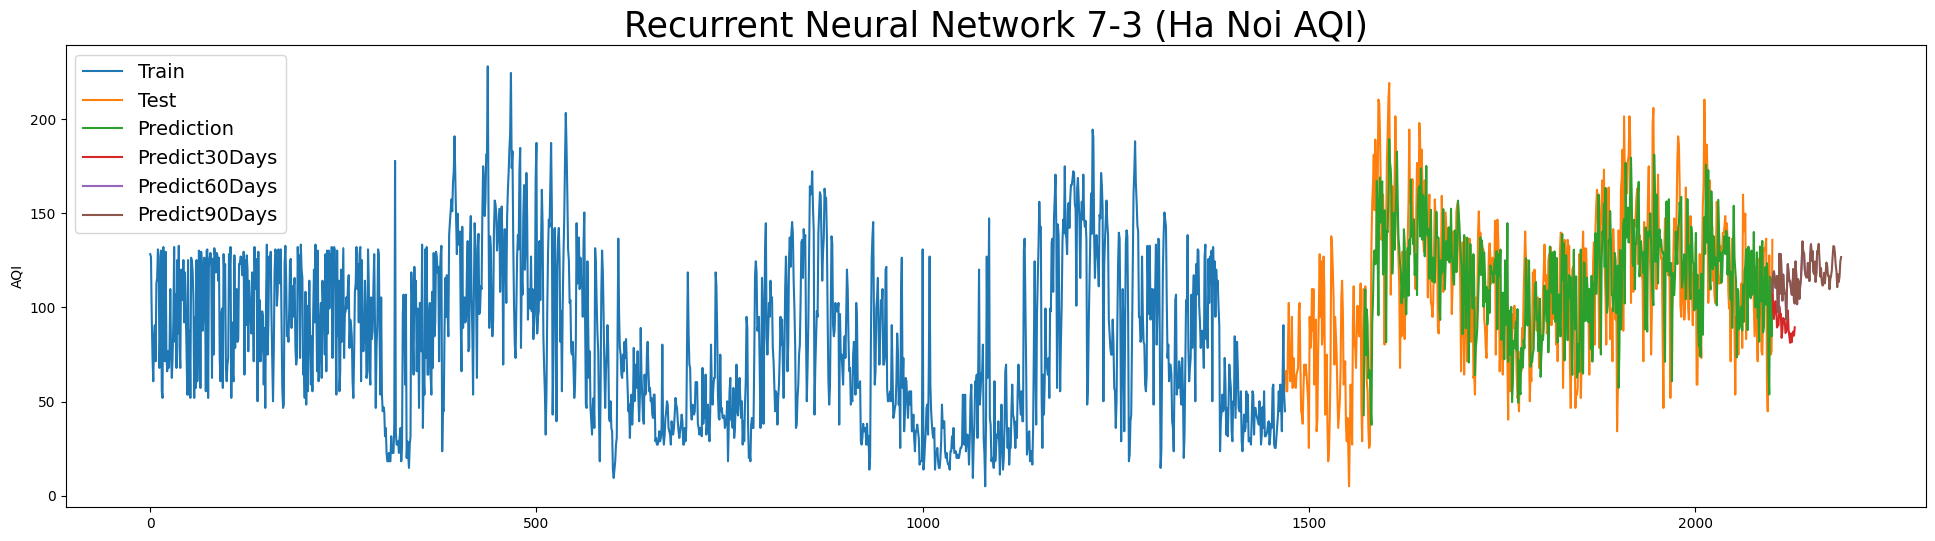

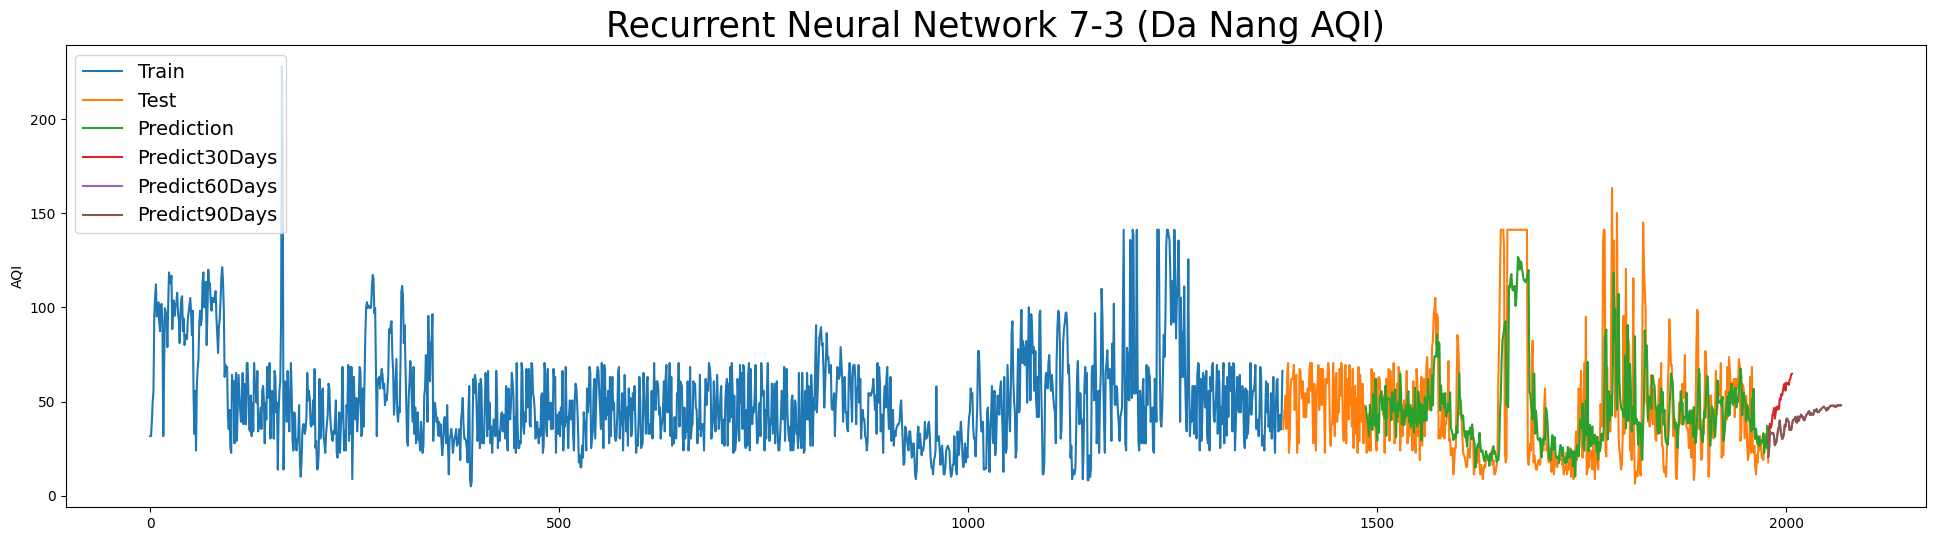

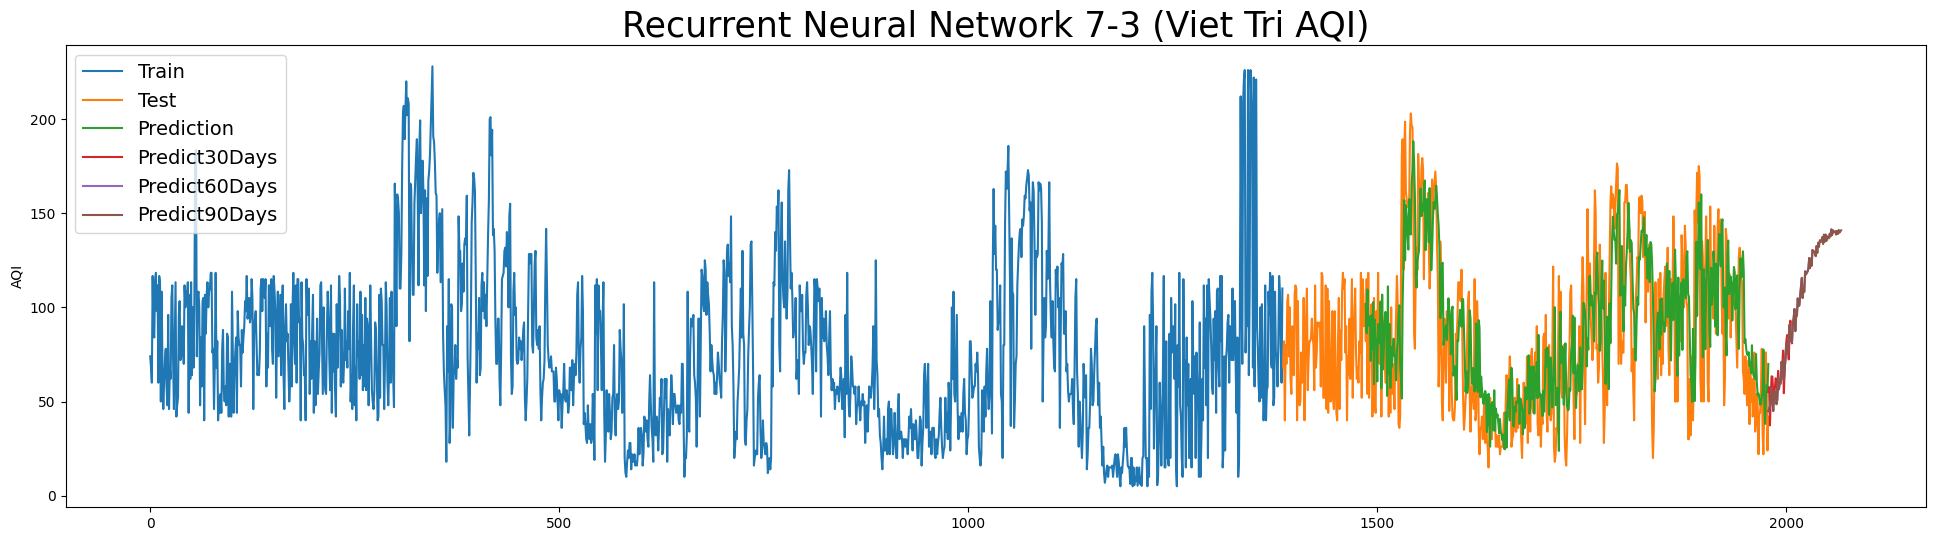

In [104]:
# Vẽ hình
plt.figure(figsize=(24, 6))
train_data_index_HN = pd.RangeIndex(start=0, stop=train_size_HN, step=1)
plt.plot(scaler.inverse_transform(train_data_HN))
test_data_index_HN = pd.RangeIndex(start=train_size_HN, stop=train_size_HN+test_size_HN, step=1)
plt.plot(test_data_index_HN,scaler.inverse_transform(test_data_HN))
test_data_index_HN = pd.RangeIndex(start=train_size_HN+101, stop=train_size_HN+test_size_HN, step=1)
plt.plot(test_data_index_HN,(y_pred_HN))
predict_data_index_HN_30 = pd.RangeIndex(start=len(df_HN)-1, stop=len(df_HN)+29, step=1)
plt.plot(predict_data_index_HN_30,scaler.inverse_transform(lst_output_HN_30))
predict_data_index_HN_60 = pd.RangeIndex(start=len(df_HN)-1, stop=len(df_HN)+59, step=1)
plt.plot(predict_data_index_HN_60,scaler.inverse_transform(lst_output_HN_60))
predict_data_index_HN_90 = pd.RangeIndex(start=len(df_HN)-1, stop=len(df_HN)+89, step=1)
plt.plot(predict_data_index_HN_90,scaler.inverse_transform(lst_output_HN_90))
plt.title('Recurrent Neural Network 7-3 (Ha Noi AQI)', fontsize=25)
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict30Days', 'Predict60Days', 'Predict90Days'], loc='upper left', fontsize=14)
plt.show()

plt.figure(figsize=(24, 6))
train_data_index_DN = pd.RangeIndex(start=0, stop=train_size_DN, step=1)
plt.plot(scaler.inverse_transform(train_data_DN))
test_data_index_DN = pd.RangeIndex(start=train_size_DN, stop=train_size_DN+test_size_DN, step=1)
plt.plot(test_data_index_DN,scaler.inverse_transform(test_data_DN))
test_data_index_DN = pd.RangeIndex(start=train_size_DN+101, stop=train_size_DN+test_size_DN, step=1)
plt.plot(test_data_index_DN,(y_pred_DN))
predict_data_index_DN_30 = pd.RangeIndex(start=len(df_DN)-1, stop=len(df_DN)+29, step=1)
plt.plot(predict_data_index_DN_30,scaler.inverse_transform(lst_output_DN_30))
predict_data_index_DN_60 = pd.RangeIndex(start=len(df_DN)-1, stop=len(df_DN)+59, step=1)
plt.plot(predict_data_index_DN_60,scaler.inverse_transform(lst_output_DN_60))
predict_data_index_DN_90 = pd.RangeIndex(start=len(df_DN)-1, stop=len(df_DN)+89, step=1)
plt.plot(predict_data_index_DN_90,scaler.inverse_transform(lst_output_DN_90))

plt.title('Recurrent Neural Network 7-3 (Da Nang AQI)', fontsize=25)
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict30Days', 'Predict60Days', 'Predict90Days'], loc='upper left', fontsize=14)
plt.show()

plt.figure(figsize=(24, 6))
train_data_index_VT = pd.RangeIndex(start=0, stop=train_size_VT, step=1)
plt.plot(scaler.inverse_transform(train_data_VT))
test_data_index_VT = pd.RangeIndex(start=train_size_VT, stop=train_size_VT+test_size_VT, step=1)
plt.plot(test_data_index_VT,scaler.inverse_transform(test_data_VT))
test_data_index_VT = pd.RangeIndex(start=train_size_VT+101, stop=train_size_VT+test_size_VT, step=1)
plt.plot(test_data_index_VT,(y_pred_VT))
predict_data_index_VT_30 = pd.RangeIndex(start=len(df_VT)-1, stop=len(df_VT)+29, step=1)
plt.plot(predict_data_index_VT_30,scaler.inverse_transform(lst_output_VT_30))
predict_data_index_VT_60 = pd.RangeIndex(start=len(df_VT)-1, stop=len(df_VT)+59, step=1)
plt.plot(predict_data_index_VT_60,scaler.inverse_transform(lst_output_VT_60))
predict_data_index_VT_90 = pd.RangeIndex(start=len(df_VT)-1, stop=len(df_VT)+89, step=1)
plt.plot(predict_data_index_VT_90,scaler.inverse_transform(lst_output_VT_90))
plt.title('Recurrent Neural Network 7-3 (Viet Tri AQI)', fontsize=25)
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict30Days', 'Predict60Days', 'Predict90Days'], loc='upper left', fontsize=14)
plt.show()

In [105]:
# Chia dữ liệu train, test theo tỉ lệ 8:2

# Hà Nội
train_size_HN = int(0.8 * len(df_HN))
test_size_HN = len(df_HN) - train_size_HN

train_data_HN = df_HN[:train_size_HN]
test_data_HN = df_HN[train_size_HN:train_size_HN+test_size_HN]

# Đà Nẵng
train_size_DN = int(0.8 * len(df_DN))
test_size_DN = len(df_DN) - train_size_DN

train_data_DN = df_DN[:train_size_DN]
test_data_DN = df_DN[train_size_DN:train_size_DN+test_size_DN]

#Việt Trì
train_size_VT = int(0.8 * len(df_VT))
test_size_VT = len(df_VT) - train_size_VT

train_data_VT = df_VT[:train_size_VT]
test_data_VT = df_VT[train_size_VT:train_size_VT+test_size_VT]

In [106]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train_HN, y_train_HN = create_dataset(train_data_HN, time_step)
X_test_HN, y_test_HN = create_dataset(test_data_HN, time_step)

X_train_DN, y_train_DN = create_dataset(train_data_DN, time_step)
X_test_DN, y_test_DN = create_dataset(test_data_DN, time_step)

X_train_VT, y_train_VT = create_dataset(train_data_VT, time_step)
X_test_VT, y_test_VT = create_dataset(test_data_VT, time_step)

In [107]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train_HN = X_train_HN.reshape(X_train_HN.shape[0],X_train_HN.shape[1] , 1)
X_test_HN = X_test_HN.reshape(X_test_HN.shape[0],X_test_HN.shape[1] , 1)

X_train_DN = X_train_DN.reshape(X_train_DN.shape[0],X_train_DN.shape[1] , 1)
X_test_DN = X_test_DN.reshape(X_test_DN.shape[0],X_test_DN.shape[1] , 1)

X_train_VT = X_train_VT.reshape(X_train_VT.shape[0],X_train_VT.shape[1] , 1)
X_test_VT = X_test_VT.reshape(X_test_VT.shape[0],X_test_VT.shape[1] , 1)

In [108]:
# Define LSTM Model

model_HN = Sequential()
model_HN.add(SimpleRNN(50, input_shape=(time_step, 1)))
model_HN.add(Dense(1))
model_HN.compile(loss='mean_squared_error',optimizer='adam')

model_DN = Sequential()
model_DN.add(SimpleRNN(50, input_shape=(time_step, 1)))
model_DN.add(Dense(1))
model_DN.compile(loss='mean_squared_error',optimizer='adam')

model_VT = Sequential()
model_VT.add(SimpleRNN(50, input_shape=(time_step, 1)))
model_VT.add(Dense(1))
model_VT.compile(loss='mean_squared_error',optimizer='adam')

In [109]:
# Fit mô hình với dữ liệu train
model_HN.fit(X_train_HN,y_train_HN,validation_data=(X_test_HN,y_test_HN),epochs=100,batch_size=64,verbose=1)
model_DN.fit(X_train_DN,y_train_DN,validation_data=(X_test_DN,y_test_DN),epochs=100,batch_size=64,verbose=1)
model_VT.fit(X_train_VT,y_train_VT,validation_data=(X_test_VT,y_test_VT),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 [==============================] - 2s 50ms/step - loss: 0.0345 - val_loss: 0.0255
Epoch 2/100
25/25 [==============================] - 1s 38ms/step - loss: 0.0239 - val_loss: 0.0223
Epoch 3/100
25/25 [==============================] - 1s 35ms/step - loss: 0.0207 - val_loss: 0.0208
Epoch 4/100
25/25 [==============================] - 1s 30ms/step - loss: 0.0192 - val_loss: 0.0188
Epoch 5/100
25/25 [==============================] - 1s 21ms/step - loss: 0.0183 - val_loss: 0.0177
Epoch 6/100
25/25 [==============================] - 1s 21ms/step - loss: 0.0162 - val_loss: 0.0166
Epoch 7/100
25/25 [==============================] - 1s 20ms/step - loss: 0.0155 - val_loss: 0.0163
Epoch 8/100
25/25 [==============================] - 1s 20ms/step - loss: 0.0153 - val_loss: 0.0162
Epoch 9/100
25/25 [==============================] - 0s 20ms/step - loss: 0.0153 - val_loss: 0.0158
Epoch 10/100
25/25 [==============================] - 1s 20ms/step - loss: 0.0151 - val_loss: 0.0171

In [110]:
# 10. Dự báo dữ liệu test
y_pred_HN=model_HN.predict(X_test_HN)
y_pred_DN=model_DN.predict(X_test_DN)
y_pred_VT=model_VT.predict(X_test_VT)

10/10 [==============================] - 0s 9ms/step


In [111]:
# Chuẩn hóa dữ liệu y_pred
y_pred_HN=scaler.inverse_transform(y_pred_HN)
y_pred_DN=scaler.inverse_transform(y_pred_DN)
y_pred_VT=scaler.inverse_transform(y_pred_VT)

In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_test_HN_scale=scaler.inverse_transform(y_test_HN.reshape(-1,1))
y_test_DN_scale=scaler.inverse_transform(y_test_DN.reshape(-1,1))
y_test_VT_scale=scaler.inverse_transform(y_test_VT.reshape(-1,1))

# Hà Nội
mape_HN = np.mean(np.abs((y_test_HN_scale - y_pred_HN) / y_test_HN_scale)) * 100
mae_HN = mean_absolute_error(y_test_HN_scale, y_pred_HN)
rmse_HN = np.sqrt(mean_squared_error(y_test_HN_scale, y_pred_HN))

print(f'Hà Nội MAPE: {mape_HN:.2f}%')
print(f'Hà Nội MAE: {mae_HN:.2f}')
print(f'Hà Nội RMSE: {rmse_HN:.2f}')

# Đà Nẵng
mape_DN = np.mean(np.abs((y_test_DN_scale - y_pred_DN) / y_test_DN_scale)) * 100
mae_DN = mean_absolute_error(y_test_DN_scale, y_pred_DN)
rmse_DN = np.sqrt(mean_squared_error(y_test_DN_scale, y_pred_DN))

print(f'Đà Nẵng MAPE: {mape_DN:.2f}%')
print(f'Đà Nẵng MAE: {mae_DN:.2f}')
print(f'Đà Nẵng RMSE: {rmse_DN:.2f}')

#Việt Trì
mape_VT = np.mean(np.abs((y_test_VT_scale - y_pred_VT) / y_test_VT_scale)) * 100
mae_VT = mean_absolute_error(y_test_VT_scale, y_pred_VT)
rmse_VT = np.sqrt(mean_squared_error(y_test_VT_scale, y_pred_VT))

print(f'Việt Trì MAPE: {mape_VT:.2f}%')
print(f'Việt Trì MAE: {mae_VT:.2f}')
print(f'Việt Trì RMSE: {rmse_VT:.2f}')

Hà Nội MAPE: 22.98%
Hà Nội MAE: 23.62
Hà Nội RMSE: 30.02
Đà Nẵng MAPE: 61.15%
Đà Nẵng MAE: 17.86
Đà Nẵng RMSE: 24.90
Việt Trì MAPE: 38.36%
Việt Trì MAE: 24.28
Việt Trì RMSE: 30.16


In [113]:
# Dự báo 30 ngày tiếp theo

x_input_HN = test_data_HN[320:].reshape(1, -1)
x_input_DN = test_data_DN[296:].reshape(1, -1)
x_input_VT = test_data_VT[296:].reshape(1, -1)

temp_input_HN = list(x_input_HN[0])
temp_input_DN = list(x_input_DN[0])
temp_input_VT = list(x_input_VT[0])

lst_output_HN = []
lst_output_DN = []
lst_output_VT = []

n_steps = 100
i = 0

while i < 30:
    # Forecast for HN
    if len(temp_input_HN) > 100:
        x_input_HN = np.array(temp_input_HN[1:])
        x_input_HN = x_input_HN.reshape(1, -1)
        x_input_HN = x_input_HN.reshape((1, n_steps, 1))
        yhat_HN = model_HN.predict(x_input_HN, verbose=0)
        temp_input_HN.extend(yhat_HN[0].tolist())
        temp_input_HN = temp_input_HN[1:]
        lst_output_HN.extend(yhat_HN.tolist())

    else:
        x_input_HN = x_input_HN.reshape((1, n_steps, 1))
        yhat_HN = model_HN.predict(x_input_HN, verbose=0)
        temp_input_HN.extend(yhat_HN[0].tolist())
        lst_output_HN.extend(yhat_HN.tolist())

    # Forecast for DN
    if len(temp_input_DN) > 100:
        x_input_DN = np.array(temp_input_DN[1:])
        x_input_DN = x_input_DN.reshape(1, -1)
        x_input_DN = x_input_DN.reshape((1, n_steps, 1))
        yhat_DN = model_DN.predict(x_input_DN, verbose=0)
        temp_input_DN.extend(yhat_DN[0].tolist())
        temp_input_DN = temp_input_DN[1:]
        lst_output_DN.extend(yhat_DN.tolist())

    else:
        x_input_DN = x_input_DN.reshape((1, n_steps, 1))
        yhat_DN = model_DN.predict(x_input_DN, verbose=0)
        temp_input_DN.extend(yhat_DN[0].tolist())
        lst_output_DN.extend(yhat_DN.tolist())

    # Forecast for VT
    if len(temp_input_VT) > 100:
        x_input_VT = np.array(temp_input_VT[1:])
        x_input_VT = x_input_VT.reshape(1, -1)
        x_input_VT = x_input_VT.reshape((1, n_steps, 1))
        yhat_VT = model_VT.predict(x_input_VT, verbose=0)
        temp_input_VT.extend(yhat_VT[0].tolist())
        temp_input_VT = temp_input_VT[1:]
        lst_output_VT.extend(yhat_VT.tolist())

    else:
        x_input_VT = x_input_VT.reshape((1, n_steps, 1))
        yhat_VT = model_VT.predict(x_input_VT, verbose=0)
        temp_input_VT.extend(yhat_VT[0].tolist())
        lst_output_VT.extend(yhat_VT.tolist())

    i += 1

In [114]:
# Dự báo 60 ngày tiếp theo

x_input_HN = test_data_HN[320:].reshape(1, -1)
x_input_DN = test_data_DN[296:].reshape(1, -1)
x_input_VT = test_data_VT[296:].reshape(1, -1)


temp_input_HN = list(x_input_HN[0])
temp_input_DN = list(x_input_DN[0])
temp_input_VT = list(x_input_VT[0])

lst_output_HN_60 = []
lst_output_DN_60 = []
lst_output_VT_60 = []

n_steps = 100
i = 0

while i < 60:
    # Forecast for HN
    if len(temp_input_HN) > 100:
        x_input_HN = np.array(temp_input_HN[1:])
        x_input_HN = x_input_HN.reshape(1, -1)
        x_input_HN = x_input_HN.reshape((1, n_steps, 1))
        yhat_HN = model_HN.predict(x_input_HN, verbose=0)
        temp_input_HN.extend(yhat_HN[0].tolist())
        temp_input_HN = temp_input_HN[1:]
        lst_output_HN_60.extend(yhat_HN.tolist())

    else:
        x_input_HN = x_input_HN.reshape((1, n_steps, 1))
        yhat_HN = model_HN.predict(x_input_HN, verbose=0)
        temp_input_HN.extend(yhat_HN[0].tolist())
        lst_output_HN_60.extend(yhat_HN.tolist())

    # Forecast for DN
    if len(temp_input_DN) > 100:
        x_input_DN = np.array(temp_input_DN[1:])
        x_input_DN = x_input_DN.reshape(1, -1)
        x_input_DN = x_input_DN.reshape((1, n_steps, 1))
        yhat_DN = model_DN.predict(x_input_DN, verbose=0)
        temp_input_DN.extend(yhat_DN[0].tolist())
        temp_input_DN = temp_input_DN[1:]
        lst_output_DN_60.extend(yhat_DN.tolist())

    else:
        x_input_DN = x_input_DN.reshape((1, n_steps, 1))
        yhat_DN = model_DN.predict(x_input_DN, verbose=0)
        temp_input_DN.extend(yhat_DN[0].tolist())
        lst_output_DN_60.extend(yhat_DN.tolist())

    # Forecast for VT
    if len(temp_input_VT) > 100:
        x_input_VT = np.array(temp_input_VT[1:])
        x_input_VT = x_input_VT.reshape(1, -1)
        x_input_VT = x_input_VT.reshape((1, n_steps, 1))
        yhat_VT = model_VT.predict(x_input_VT, verbose=0)
        temp_input_VT.extend(yhat_VT[0].tolist())
        temp_input_VT = temp_input_VT[1:]
        lst_output_VT_60.extend(yhat_VT.tolist())

    else:
        x_input_VT = x_input_VT.reshape((1, n_steps, 1))
        yhat_VT = model_VT.predict(x_input_VT, verbose=0)
        temp_input_VT.extend(yhat_VT[0].tolist())
        lst_output_VT_60.extend(yhat_VT.tolist())

    i += 1

In [115]:
# Dự báo 90 ngày tiếp theo

x_input_HN = test_data_HN[320:].reshape(1, -1)
x_input_DN = test_data_DN[296:].reshape(1, -1)
x_input_VT = test_data_VT[296:].reshape(1, -1)

temp_input_HN = list(x_input_HN[0])
temp_input_DN = list(x_input_DN[0])
temp_input_VT = list(x_input_VT[0])

lst_output_HN_90 = []
lst_output_DN_90 = []
lst_output_VT_90 = []

n_steps = 100
i = 0

while i < 90:
    # Forecast for HN
    if len(temp_input_HN) > 100:
        x_input_HN = np.array(temp_input_HN[1:])
        x_input_HN = x_input_HN.reshape(1, -1)
        x_input_HN = x_input_HN.reshape((1, n_steps, 1))
        yhat_HN = model_HN.predict(x_input_HN, verbose=0)
        temp_input_HN.extend(yhat_HN[0].tolist())
        temp_input_HN = temp_input_HN[1:]
        lst_output_HN_90.extend(yhat_HN.tolist())

    else:
        x_input_HN = x_input_HN.reshape((1, n_steps, 1))
        yhat_HN = model_HN.predict(x_input_HN, verbose=0)
        temp_input_HN.extend(yhat_HN[0].tolist())
        lst_output_HN_90.extend(yhat_HN.tolist())

    # Forecast for DN
    if len(temp_input_DN) > 100:
        x_input_DN = np.array(temp_input_DN[1:])
        x_input_DN = x_input_DN.reshape(1, -1)
        x_input_DN = x_input_DN.reshape((1, n_steps, 1))
        yhat_DN = model_DN.predict(x_input_DN, verbose=0)
        temp_input_DN.extend(yhat_DN[0].tolist())
        temp_input_DN = temp_input_DN[1:]
        lst_output_DN_90.extend(yhat_DN.tolist())

    else:
        x_input_DN = x_input_DN.reshape((1, n_steps, 1))
        yhat_DN = model_DN.predict(x_input_DN, verbose=0)
        temp_input_DN.extend(yhat_DN[0].tolist())
        lst_output_DN_90.extend(yhat_DN.tolist())

    # Forecast for VT
    if len(temp_input_VT) > 100:
        x_input_VT = np.array(temp_input_VT[1:])
        x_input_VT = x_input_VT.reshape(1, -1)
        x_input_VT = x_input_VT.reshape((1, n_steps, 1))
        yhat_VT = model_VT.predict(x_input_VT, verbose=0)
        temp_input_VT.extend(yhat_VT[0].tolist())
        temp_input_VT = temp_input_VT[1:]
        lst_output_VT_90.extend(yhat_VT.tolist())

    else:
        x_input_VT = x_input_VT.reshape((1, n_steps, 1))
        yhat_VT = model_VT.predict(x_input_VT, verbose=0)
        temp_input_VT.extend(yhat_VT[0].tolist())
        lst_output_VT_90.extend(yhat_VT.tolist())

    i += 1

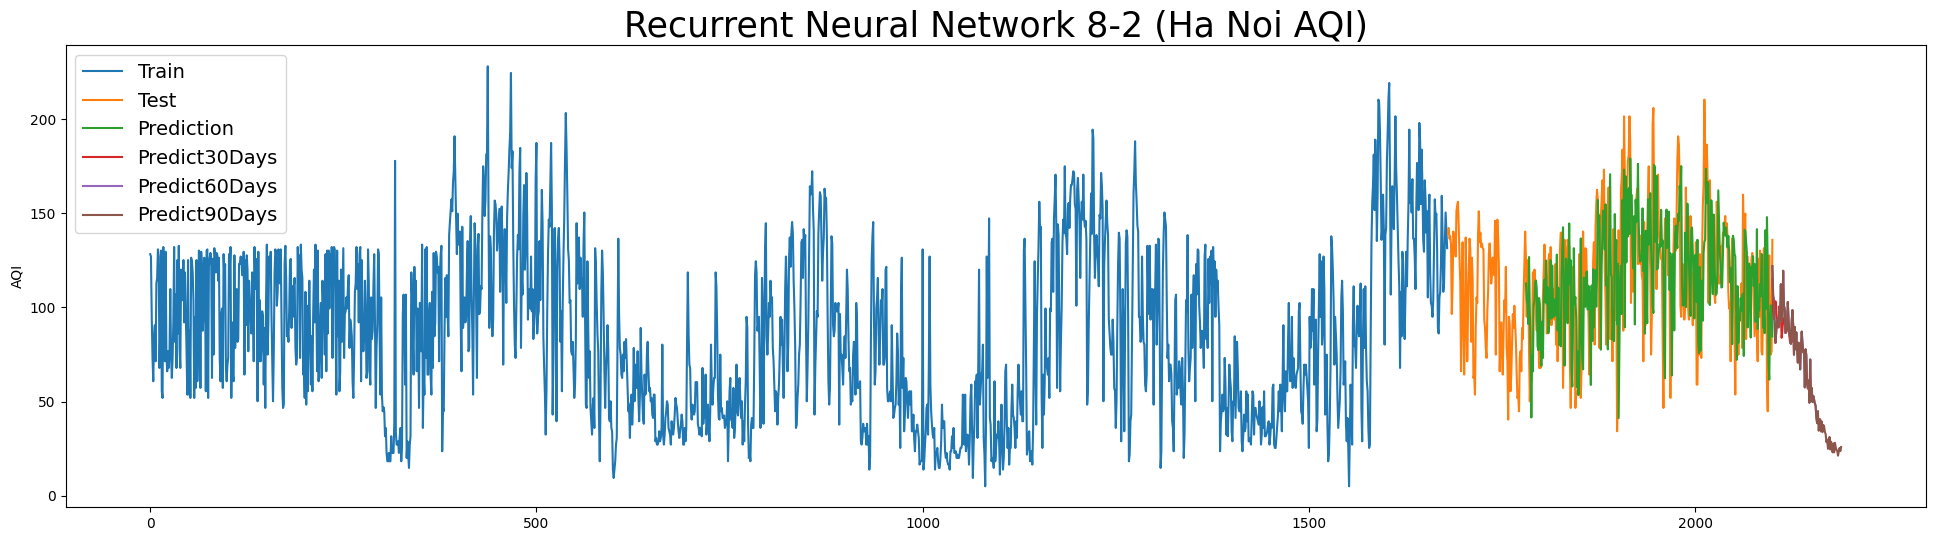

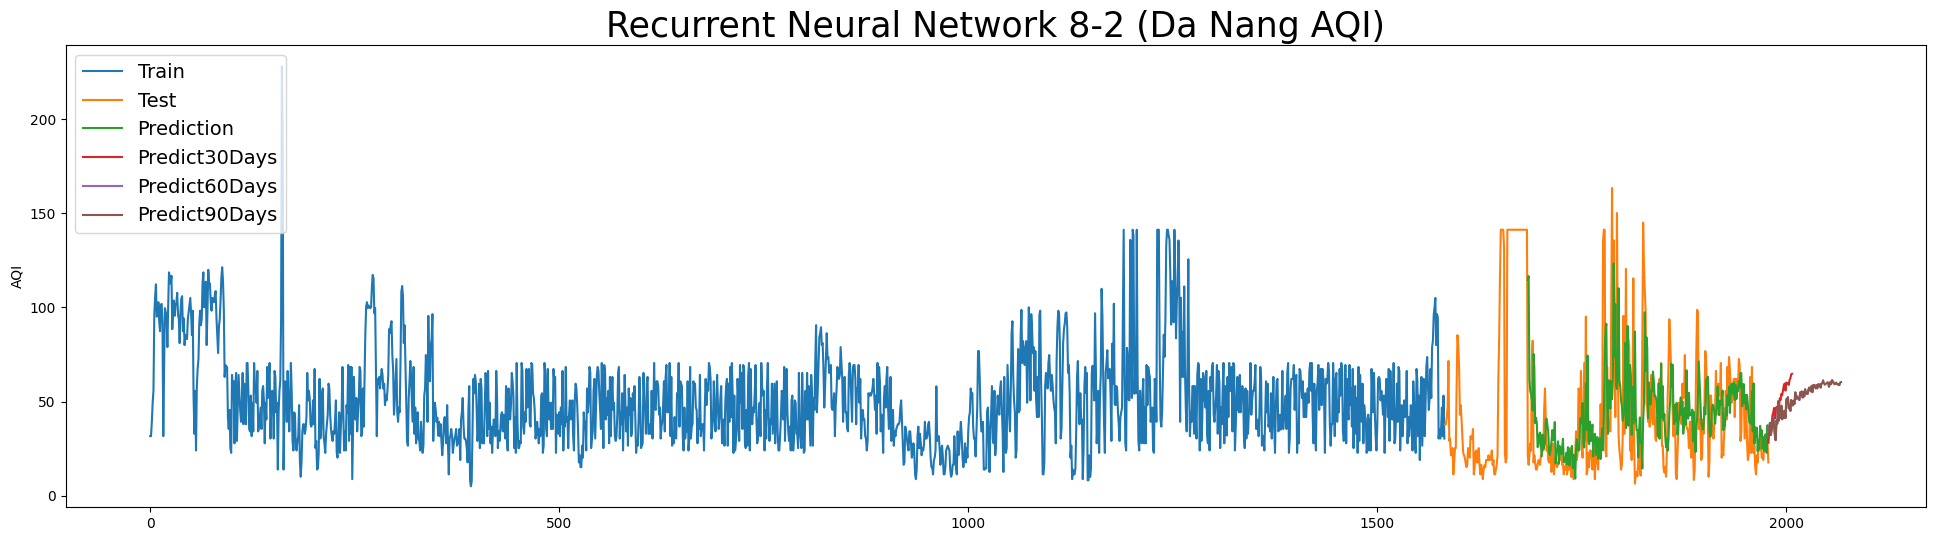

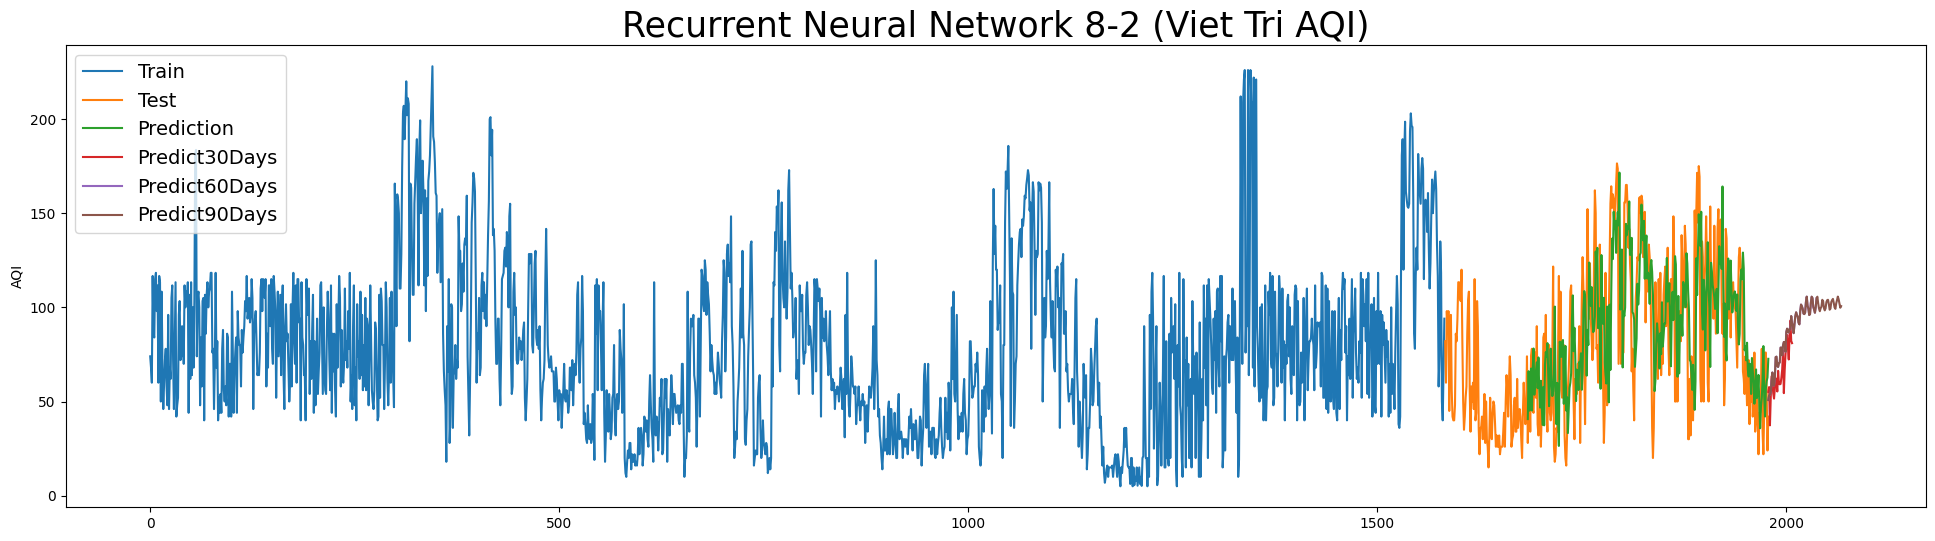

In [116]:
# Vẽ hình
plt.figure(figsize=(24, 6))
train_data_index_HN = pd.RangeIndex(start=0, stop=train_size_HN, step=1)
plt.plot(scaler.inverse_transform(train_data_HN))
test_data_index_HN = pd.RangeIndex(start=train_size_HN, stop=train_size_HN+test_size_HN, step=1)
plt.plot(test_data_index_HN,scaler.inverse_transform(test_data_HN))
test_data_index_HN = pd.RangeIndex(start=train_size_HN+101, stop=train_size_HN+test_size_HN, step=1)
plt.plot(test_data_index_HN,(y_pred_HN))
predict_data_index_HN_30 = pd.RangeIndex(start=len(df_HN)-1, stop=len(df_HN)+29, step=1)
plt.plot(predict_data_index_HN_30,scaler.inverse_transform(lst_output_HN_30))
predict_data_index_HN_60 = pd.RangeIndex(start=len(df_HN)-1, stop=len(df_HN)+59, step=1)
plt.plot(predict_data_index_HN_60,scaler.inverse_transform(lst_output_HN_60))
predict_data_index_HN_90 = pd.RangeIndex(start=len(df_HN)-1, stop=len(df_HN)+89, step=1)
plt.plot(predict_data_index_HN_90,scaler.inverse_transform(lst_output_HN_90))
plt.title('Recurrent Neural Network 8-2 (Ha Noi AQI)', fontsize=25)
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict30Days', 'Predict60Days', 'Predict90Days'], loc='upper left', fontsize=14)
plt.show()

plt.figure(figsize=(24, 6))
train_data_index_DN = pd.RangeIndex(start=0, stop=train_size_DN, step=1)
plt.plot(scaler.inverse_transform(train_data_DN))
test_data_index_DN = pd.RangeIndex(start=train_size_DN, stop=train_size_DN+test_size_DN, step=1)
plt.plot(test_data_index_DN,scaler.inverse_transform(test_data_DN))
test_data_index_DN = pd.RangeIndex(start=train_size_DN+101, stop=train_size_DN+test_size_DN, step=1)
plt.plot(test_data_index_DN,(y_pred_DN))
predict_data_index_DN_30 = pd.RangeIndex(start=len(df_DN)-1, stop=len(df_DN)+29, step=1)
plt.plot(predict_data_index_DN_30,scaler.inverse_transform(lst_output_DN_30))
predict_data_index_DN_60 = pd.RangeIndex(start=len(df_DN)-1, stop=len(df_DN)+59, step=1)
plt.plot(predict_data_index_DN_60,scaler.inverse_transform(lst_output_DN_60))
predict_data_index_DN_90 = pd.RangeIndex(start=len(df_DN)-1, stop=len(df_DN)+89, step=1)
plt.plot(predict_data_index_DN_90,scaler.inverse_transform(lst_output_DN_90))

plt.title('Recurrent Neural Network 8-2 (Da Nang AQI)', fontsize=25)
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict30Days', 'Predict60Days', 'Predict90Days'], loc='upper left', fontsize=14)
plt.show()

plt.figure(figsize=(24, 6))
train_data_index_VT = pd.RangeIndex(start=0, stop=train_size_VT, step=1)
plt.plot(scaler.inverse_transform(train_data_VT))
test_data_index_VT = pd.RangeIndex(start=train_size_VT, stop=train_size_VT+test_size_VT, step=1)
plt.plot(test_data_index_VT,scaler.inverse_transform(test_data_VT))
test_data_index_VT = pd.RangeIndex(start=train_size_VT+101, stop=train_size_VT+test_size_VT, step=1)
plt.plot(test_data_index_VT,(y_pred_VT))
predict_data_index_VT_30 = pd.RangeIndex(start=len(df_VT)-1, stop=len(df_VT)+29, step=1)
plt.plot(predict_data_index_VT_30,scaler.inverse_transform(lst_output_VT_30))
predict_data_index_VT_60 = pd.RangeIndex(start=len(df_VT)-1, stop=len(df_VT)+59, step=1)
plt.plot(predict_data_index_VT_60,scaler.inverse_transform(lst_output_VT_60))
predict_data_index_VT_90 = pd.RangeIndex(start=len(df_VT)-1, stop=len(df_VT)+89, step=1)
plt.plot(predict_data_index_VT_90,scaler.inverse_transform(lst_output_VT_90))
plt.title('Recurrent Neural Network 8-2 (Viet Tri AQI)', fontsize=25)
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict30Days', 'Predict60Days', 'Predict90Days'], loc='upper left', fontsize=14)
plt.show()